This code will detect vacuoles within an image. 


input: micrgraph with many vacuoles
output: enhance contrast image
        coordinates of every vacuole and their relative radii
        

In [474]:
#Get a bunch of functions

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, img_as_float
from skimage import exposure
from skimage import filters
from scipy import ndimage as ndi
from math import sqrt
from skimage import feature
from skimage.feature import blob_dog
from skimage import draw
from skimage import morphology

(1200, 1920)

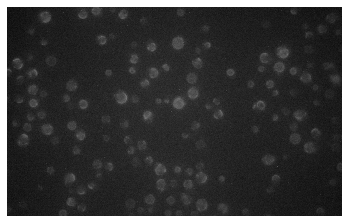

In [475]:
#Import image 
im1 = io.imread("IM1.ome.png")
im = img_as_float(im1) #adjust so all pixel values are scaled between 0 and 1

plt.imshow(im, cmap='gray')
plt.axis('off')
im.shape

(-0.5, 1919.5, 1199.5, -0.5)

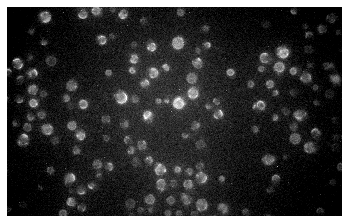

In [545]:
# Enhance contrast - stretching method 
# My understanding is that this is still a linear change in contrast
# I chose these values based on this image. Will need to see how it does on other ones. 

p_low, p_high = np.percentile(im, (18,99.99))
im_rescale = exposure.rescale_intensity(im, in_range=(p_low, p_high))

plt.imshow(im_rescale, cmap='gray')
plt.axis('off')

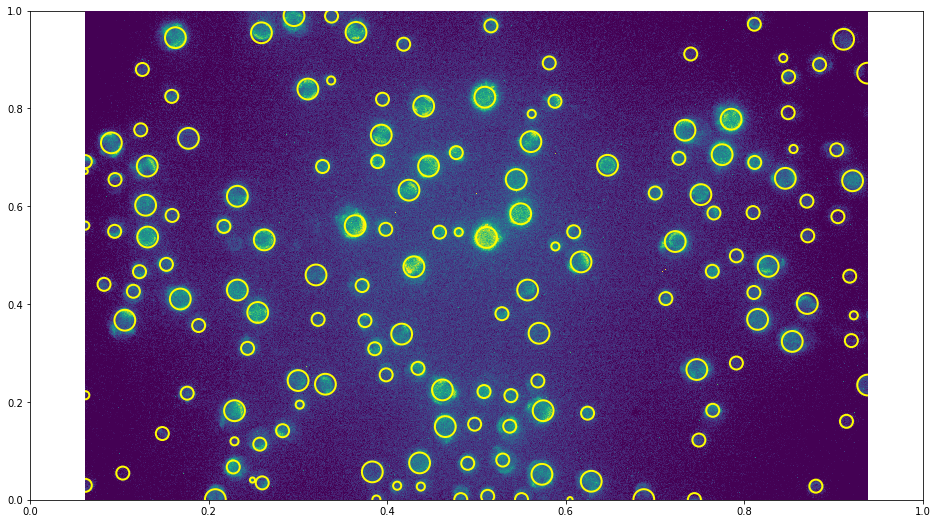

In [560]:
blobs_dog = blob_dog(im_rescale, min_sigma=.95, max_sigma=30, threshold=.2)
#blobs_dog[:, 2] = blobs_dog[:, 2] * 1.2 #if we want to include a slightly larger radius. 

fig, axes = plt.subplots(1, 1, figsize =(16,9))

ax = fig.add_subplot(1, 1, 1)

for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
    
plt.axis('off')
plt.imshow(im_rescale)
plt.show()

In [561]:
# read in original image, this is so that our mask turns out the same size
image = im_rescale

# create the mask image
mask = np.ones(shape=image.shape[0:2], dtype="bool")

for blob in blobs_dog:
    y, x, r = blob
    # taking the coordinates from the blob detection, draw circles on mask
    rr, cc = draw.circle(y, x, r, shape=image.shape[0:2])
    mask[rr, cc] = False

#plt.imshow(mask, cmap='gray')
#plt.axis('off')

(-0.5, 1919.5, 1199.5, -0.5)

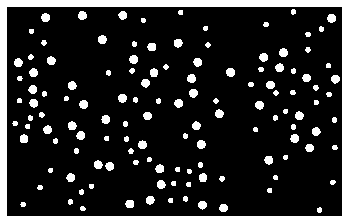

In [572]:
from skimage.util import invert
from skimage.morphology import remove_small_objects
from skimage.segmentation import clear_border

mask1 = invert(mask)
mask2 = remove_small_objects(mask1, min_size=750)
mask3 = clear_border(mask2)

plt.imshow(mask3, cmap='gray')
plt.axis('off')

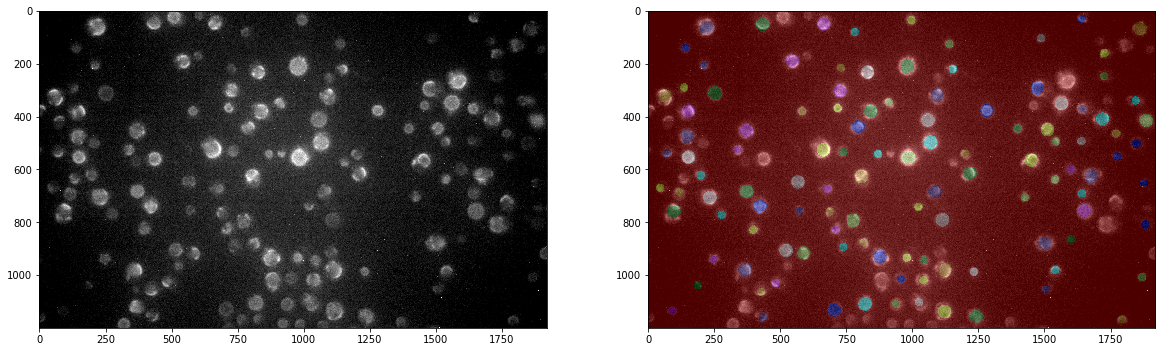

In [573]:
from scipy.ndimage import label
from skimage.color import label2rgb

labeled_vacuoles, _ = label(mask3) 
image_label_overlay = label2rgb(labeled_vacuoles, image=im_rescale)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(im_rescale, cmap='gray')
axes[1].imshow(image_label_overlay, cmap='gray')

In [574]:
from skimage import measure
from skimage.measure import regionprops
from skimage.measure import regionprops_table 

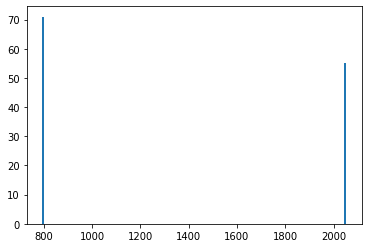

In [575]:
#what is the size distribution of vacuoles. We will want to cut out the super small ones I think

object_features = measure.regionprops(labeled_vacuoles)
object_areas = [objf["area"] for objf in object_features]
plt.hist(object_areas, bins=126)
plt.show()

In [576]:
#get the pixel values for each region
#this will return a 2d array

PV_props =regionprops(labeled_vacuoles, intensity_image=im_rescale) 

In [577]:
#(PV_props[0].intensity_image).shape
#print(PV_props[0].intensity_image)
#print( PV_props[0].intensity_image[0])
#len(PV_props[0].intensity_image)
print(len(object_areas))

126


In [578]:
stddev_list = []
mean_list = []

for i in range(126):
    
    mean = np.mean(PV_props[i].intensity_image)
    stddev = np.std(some_props[i].intensity_image)
    mean_list.append(mean)
    stddev_list.append(stddev)
    #print("vacuole" + str(i)+ " mean is "+str(mean) +" stddev is "+ str(stddev))

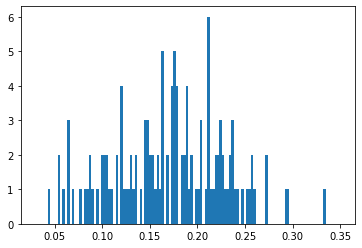

In [579]:
x = stddev_list
plt.hist(x, range = (0.03,.35), bins=126)
plt.show()

In [584]:
Array_high = []
Array_low = []

for i in range(126):
    
    stddev = np.std(some_props[i].intensity_image)
    if stddev >= 0.14:
        #Array_high.append(i) 
        centroid = PV_props[i].centroid
        Array_high.append(centroid)
        #Array_high.append(stddev)
       
    else:
        #Array_low.append(i)
        centroid = PV_props[i].centroid
        Array_low.append(centroid)
        #Array_low.append(stddev) 

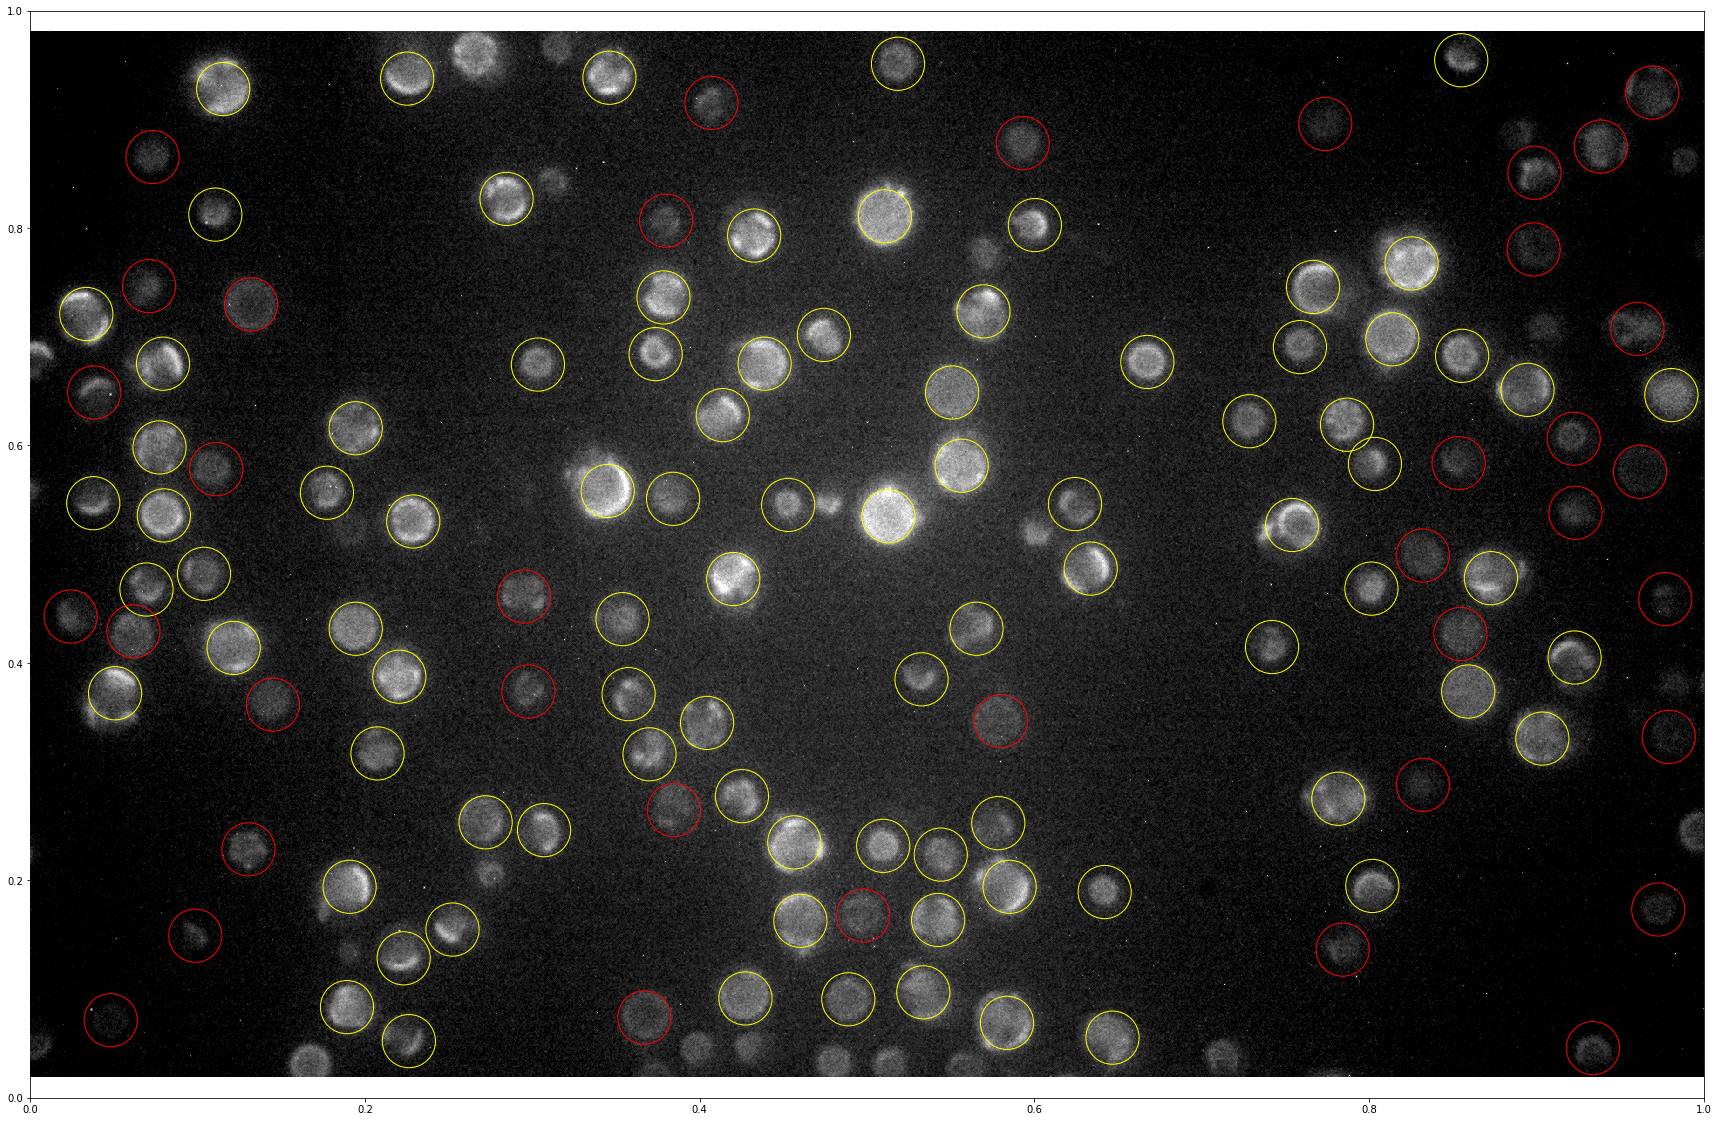

In [587]:
# read in original image, this is so that our mask turns out the same size
image = im_rescale

# create the mask image
mask = np.ones(shape=image.shape[0:2], dtype="bool")

fig, axes = plt.subplots(1, 1, figsize=(30,20))

ax = fig.add_subplot(1, 1, 1)

for centroid in Array_high:
    y, x = centroid
    c = plt.Circle((x, y), r+5, color='yellow', linewidth=1, fill=False)
    ax.add_patch(c)
    
for centroid in Array_low:
    y, x = centroid
    c = plt.Circle((x, y), r+5, color='red', linewidth=1, fill=False)
    ax.add_patch(c)
    
plt.axis('off')
plt.imshow(im_rescale, cmap="gray")
#plt.title('Yellow = high std, potential demixed      Red = low std, potential mixed', fontsize=30)
plt.show()

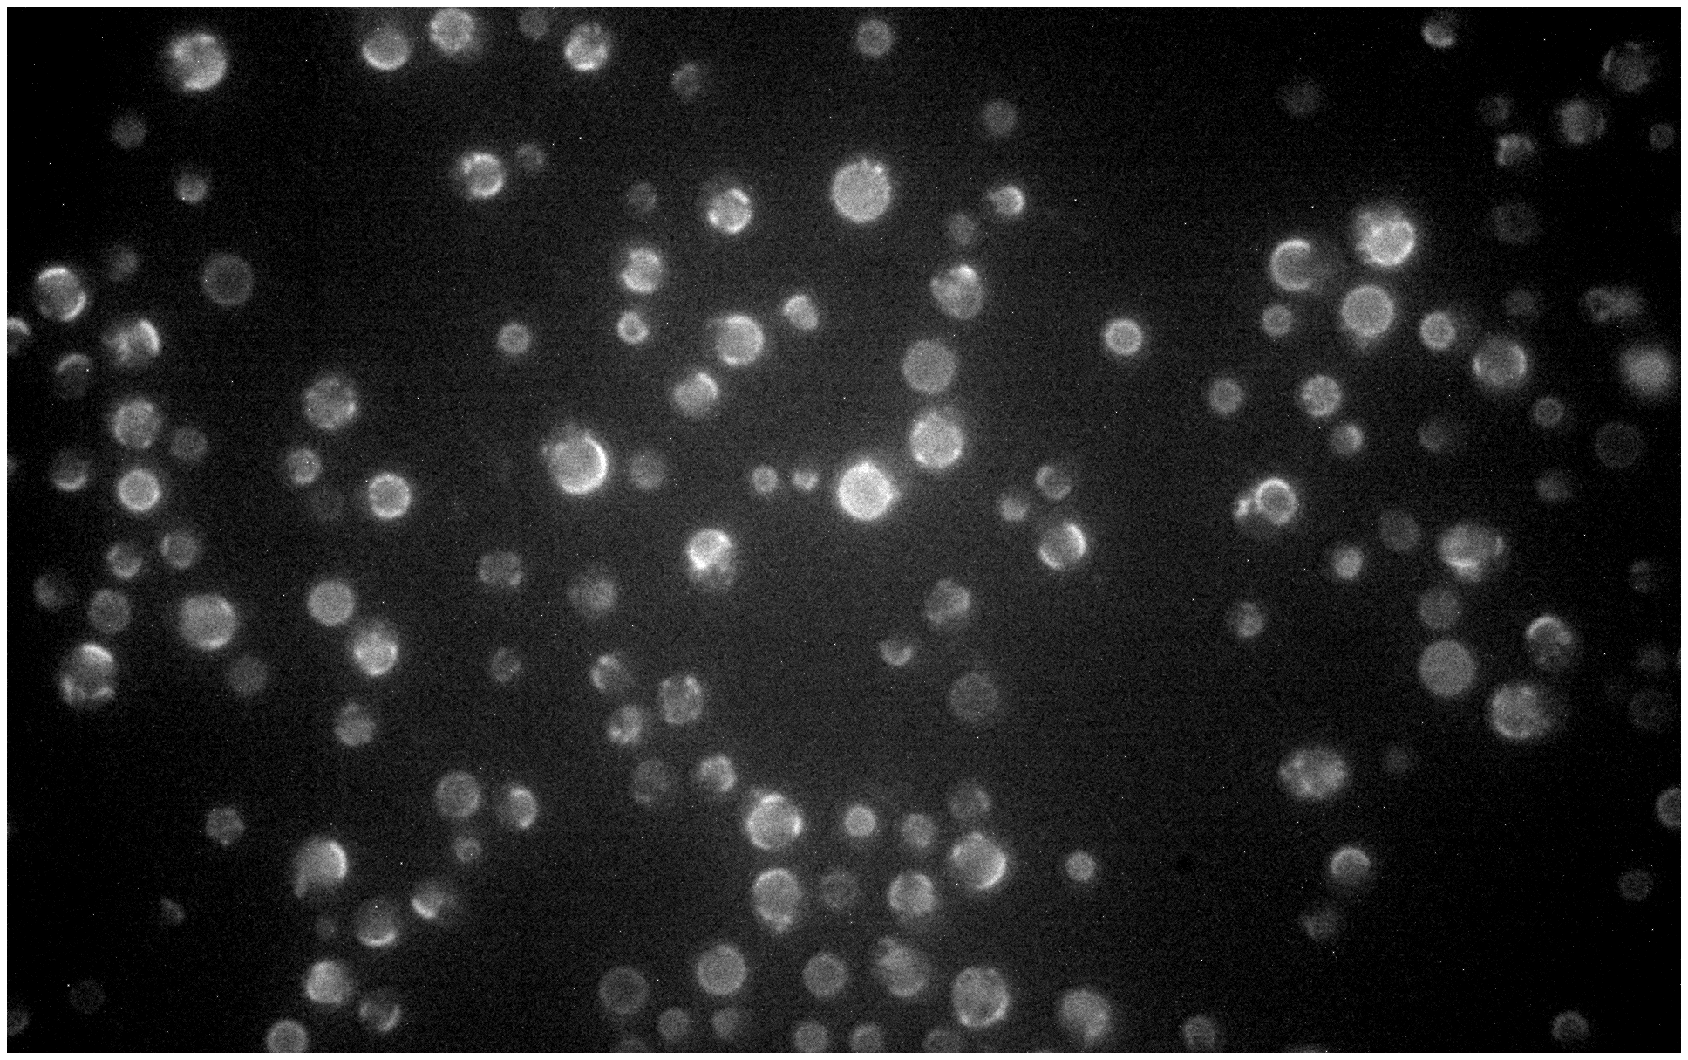

In [586]:
fig, axes = plt.subplots(1, 1, figsize=(30,20))
plt.axis('off')
plt.imshow(im_rescale, cmap="gray")
plt.show()